In [43]:
from google.cloud import bigquery
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PROJECT_ID = "integrated-bit-312717"
DATASET_NAME = 'customs'
TABLE_NAME = "customs_test"

table_id = "{project_id}.{dataset_name}.{table_name}".format(project_id=PROJECT_ID, dataset_name=DATASET_NAME, 
            table_name=TABLE_NAME)

In [3]:
client = bigquery.Client(project=PROJECT_ID, location="US")

In [4]:
query_job = client.query(
    """
        SELECT * from `integrated-bit-312717.customs.customs_test` where country='THAILAND'
    """
)
result = query_job.result()
result

In [5]:
data = [(row.country, row.hs_code, row.year_month, row.value) for row in result]
data

[('THAILAND', '2001', '2001-05', 0),
 ('THAILAND', '2001', '2001-10', 35202),
 ('THAILAND', '2001', '2001-07', 37308069),
 ('THAILAND', '2001', '2001-03', 0),
 ('THAILAND', '2001', '2001-10', 0),
 ('THAILAND', '2001', '2001-12', 109356756),
 ('THAILAND', '2001', '2001-02', 0),
 ('THAILAND', '2001', '2001-04', 0),
 ('THAILAND', '2001', '2001-04', 46188836),
 ('THAILAND', '2001', '2001-06', 569561),
 ('THAILAND', '2001', '2001-06', 0),
 ('THAILAND', '2001', '2001-07', 0),
 ('THAILAND', '2001', '2001-10', 6682),
 ('THAILAND', '2001', '2001-03', 0),
 ('THAILAND', '2001', '2001-02', 0),
 ('THAILAND', '2001', '2001-03', 0),
 ('THAILAND', '2001', '2001-07', 0),
 ('THAILAND', '2001', '2001-06', 0),
 ('THAILAND', '2001', '2001-05', 0),
 ('THAILAND', '2001', '2001-03', 1283667),
 ('THAILAND', '2001', '2001-11', 1739947),
 ('THAILAND', '2001', '2001-06', 27168912),
 ('THAILAND', '2001', '2001-09', 0),
 ('THAILAND', '2001', '2001-02', 0),
 ('THAILAND', '2001', '2001-07', 0),
 ('THAILAND', '2001', 

In [10]:
df = pd.DataFrame(data, columns=['country', 'hs_code', 'year_month', 'value'])
df

,country,hs_code,year_month,value
0,THAILAND,2001,2001-05,0
1,THAILAND,2001,2001-10,35202
2,THAILAND,2001,2001-07,37308069
3,THAILAND,2001,2001-03,0
4,THAILAND,2001,2001-10,0
...,...,...,...,...
175674,THAILAND,2021,2021-02,0
175675,THAILAND,2021,2021-01,2345708
175676,THAILAND,2021,2021-01,5529559
175677,THAILAND,2021,2021-09,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175679 entries, 0 to 175678
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country         175679 non-null  object
 1   hs_code         175679 non-null  object
 2   year_month      175679 non-null  object
 3   value           175679 non-null  int64 
 4   year_month_num  175679 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.7+ MB


In [21]:
df.describe()

,value,year_month_num
count,1.756790e+05,175679.000000
mean,7.684578e+06,132.984318
std,7.433736e+07,69.329637
min,0.000000e+00,0.000000
25%,0.000000e+00,77.000000
50%,0.000000e+00,137.000000
75%,2.702060e+05,192.000000
max,4.486343e+09,251.000000


array([[<AxesSubplot:title={'center':'value'}>,
        <AxesSubplot:title={'center':'year_month_num'}>]], dtype=object)

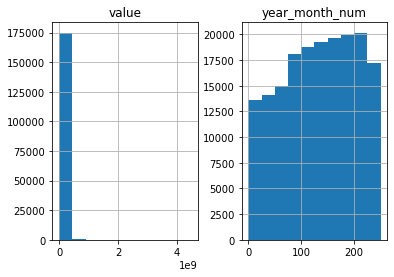

In [22]:
df.hist()

<AxesSubplot:xlabel='year_month', ylabel='value'>

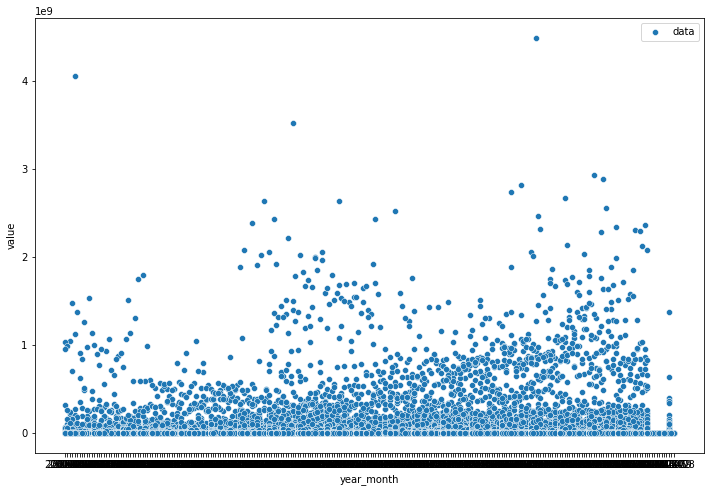

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='year_month', y='value',data=df, label='data')
# plt.grid()

In [23]:
le = LabelEncoder()
df['year_month_num'] = le.fit_transform(df['year_month'])

In [24]:
df

,country,hs_code,year_month,value,year_month_num
0,THAILAND,2001,2001-05,0,4
1,THAILAND,2001,2001-10,35202,9
2,THAILAND,2001,2001-07,37308069,6
3,THAILAND,2001,2001-03,0,2
4,THAILAND,2001,2001-10,0,9
...,...,...,...,...,...
175674,THAILAND,2021,2021-02,0,241
175675,THAILAND,2021,2021-01,2345708,240
175676,THAILAND,2021,2021-01,5529559,240
175677,THAILAND,2021,2021-09,0,248


In [25]:
df_X = df[['hs_code', 'year_month_num']]
df_X

,hs_code,year_month_num
0,2001,4
1,2001,9
2,2001,6
3,2001,2
4,2001,9
...,...,...
175674,2021,241
175675,2021,240
175676,2021,240
175677,2021,248


In [26]:
df_y = df['value']
df_y

0                0
1            35202
2         37308069
3                0
4                0
            ...   
175674           0
175675     2345708
175676     5529559
175677           0
175678           0
Name: value, Length: 175679, dtype: int64

In [27]:
X = df_X.to_numpy()
y = df_y.to_numpy()

print("X : ", X.shape)
print("y : ", y.shape)

X :  (175679, 2)
y :  (175679,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=True)

print("X train : ", X_train.shape, "\ty train : ", y_train.shape)
print("X test : ", X_test.shape, "\ty test : ", y_test.shape)

X train :  (131759, 2) 	y train :  (131759,)
X test :  (43920, 2) 	y test :  (43920,)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear = LinearRegression()

In [32]:
linear.fit(X_train, y_train)

LinearRegression()

In [34]:
linear.score(X_test, y_test)

0.00044023612292098946

In [35]:
import sklearn

In [36]:
models = {
    'LinearSVR':sklearn.svm.LinearSVR()
}

In [37]:
for model_name, model in models.items():
    print(model_name)
    model.fit(X_train, y_train)

LinearSVR


In [39]:
scores = { model_name:model.score(X_test, y_test) for model_name, model in models.items() }
scores

{'LinearSVR': -0.010119825578455588}